In [1]:
!pip install biopython goatools gprofiler-official matplotlib pandas


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 8.4 MB/s eta 0:00:00
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=0cfe48814b2e04121aae5a4c46cf4f43336331d4046b5729ee6e13e6a35b4b34
  Stored in directory: /root/.cache/pip/wheels/1a/b0/8c/4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
Successfully built docopt


In [4]:
from google.colab import drive
drive.mount('/content/drive')
excel_file = "/content/drive/MyDrive/DR_SANDHYA_PID250_PROTEOMICS_ANALYSIS.xlsx"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!pip install goatools matplotlib pandas openpyxl requests

import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
import numpy as np
from goatools.anno.gaf_reader import GafReader
from goatools.go_enrichment import GOEnrichmentStudy

In [6]:
!pip install pandas openpyxl

import pandas as pd

# --- STEP 1: Specify the path to your Excel file in Google Drive ---
#          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#          REPLACE THIS WITH THE ACTUAL PATH TO YOUR EXCEL FILE

# --- STEP 2: Specify the output text file path in Google Drive ---
output_text_file = "/content/drive/MyDrive/protein_accessions.txt"
#                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#                   REPLACE THIS WITH YOUR DESIRED OUTPUT PATH

# --- STEP 3: Read Protein Accession Numbers from Excel and write to text file ---
try:
    df = pd.read_excel(excel_file)
    protein_accessions = df.iloc[658:1581, 0].tolist()
    protein_accessions = [str(acc).strip() for acc in protein_accessions if pd.notna(acc)]

    with open(output_text_file, 'w') as f:
        for acc in protein_accessions:
            f.write(acc + '\n')

    print(f"Successfully extracted {len(protein_accessions)} protein accession IDs and saved them to '{output_text_file}'")

except FileNotFoundError:
    print(f"Error: Excel file not found at '{excel_file}'. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
/usr/local/lib/python3.11/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


Successfully extracted 923 protein accession IDs and saved them to '/content/drive/MyDrive/protein_accessions.txt'


In [7]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/protein_accessions.txt"

# Read the file (assuming one accession per line)
accessions = pd.read_csv(file_path, header=None)[0].tolist()

print("Total accessions loaded:", len(accessions))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Total accessions loaded: 923


In [9]:
from gprofiler import GProfiler

gp = GProfiler(return_dataframe=True)
go_results = gp.profile(organism='hsapiens', query=accessions)

# Display first few results
go_results.head()


,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:CC,GO:0031974,membrane-enclosed lumen,7.626992e-82,True,"""The enclosed volume within a sealed membrane ...",6663,703,458,22115,0.651494,0.068738,query_1,[GO:0110165]
1,GO:CC,GO:0070013,intracellular organelle lumen,7.626992e-82,True,"""An organelle lumen that is part of an intrace...",6663,703,458,22115,0.651494,0.068738,query_1,"[GO:0043229, GO:0043233]"
2,GO:CC,GO:0043233,organelle lumen,7.626992e-82,True,"""The internal volume enclosed by the membranes...",6663,703,458,22115,0.651494,0.068738,query_1,"[GO:0031974, GO:0043226]"
3,GO:CC,GO:0005654,nucleoplasm,1.206637e-81,True,"""That part of the nuclear content other than t...",4229,703,360,22115,0.512091,0.085127,query_1,"[GO:0031981, GO:0110165]"
4,GO:CC,GO:0031981,nuclear lumen,6.971911e-70,True,"""The volume enclosed by the nuclear inner memb...",5524,703,396,22115,0.563300,0.071687,query_1,"[GO:0005634, GO:0070013]"


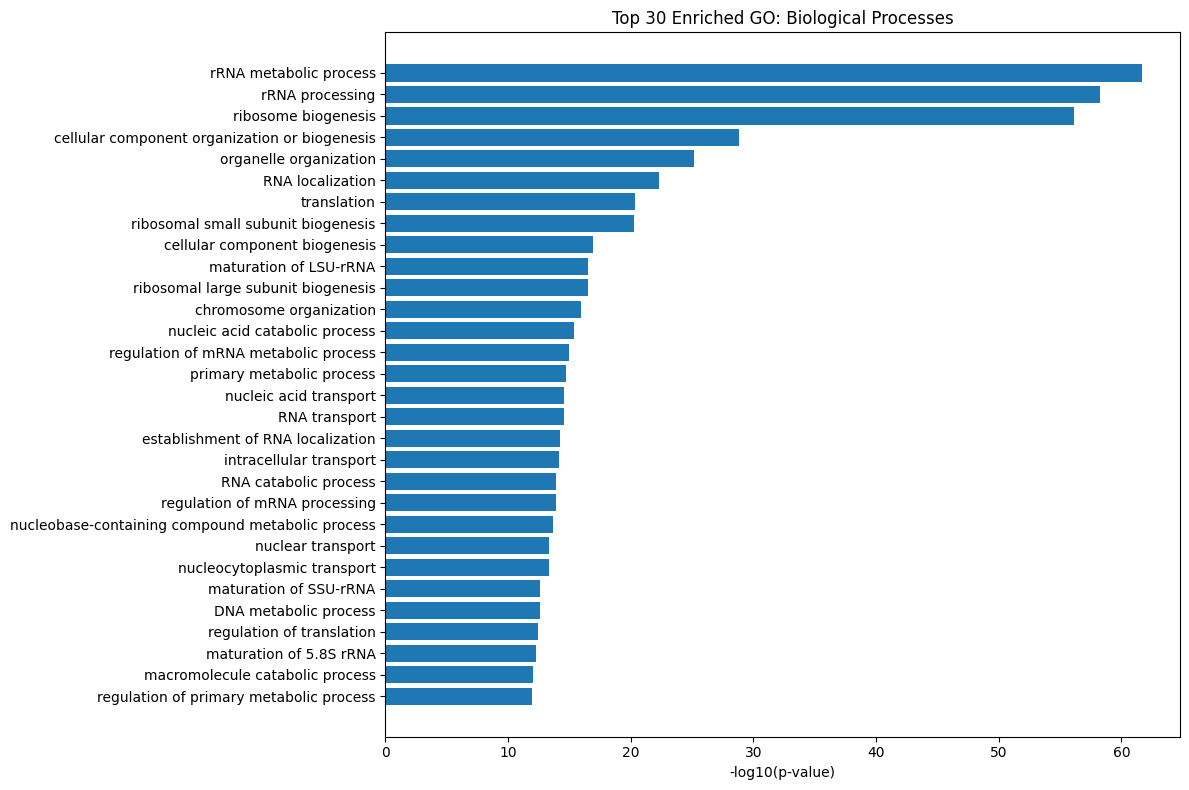

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Filter Biological Process (GO:BP) terms and sort by p-value
top_go = go_results[go_results['source'] == 'GO:BP'].sort_values(by='p_value').head(30)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_go['name'][::-1], -np.log10(top_go['p_value'])[::-1])
plt.xlabel('-log10(p-value)')
plt.title('Top 30 Enriched GO: Biological Processes')
plt.tight_layout()
plt.show()


In [9]:
!pip install gprofiler-official networkx plotly


In [11]:
print(go_results.columns)


Index(['source', 'native', 'name', 'p_value', 'significant', 'description',
       'term_size', 'query_size', 'intersection_size', 'effective_domain_size',
       'precision', 'recall', 'query', 'parents'],
      dtype='object')


In [12]:
import networkx as nx
import numpy as np

# Use top 20 GO terms
top_go = go_results.sort_values(by='p_value').head(20)

G = nx.Graph()

# Add nodes
for _, row in top_go.iterrows():
    G.add_node(row['name'], pval=row['p_value'])

# Add edges based on shared words in GO term names
for i in range(len(top_go)):
    for j in range(i+1, len(top_go)):
        words_i = set(top_go.iloc[i]['name'].lower().split())
        words_j = set(top_go.iloc[j]['name'].lower().split())
        if words_i & words_j:
            G.add_edge(top_go.iloc[i]['name'], top_go.iloc[j]['name'])


In [18]:
go_results.head()

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents
0,GO:CC,GO:0031974,membrane-enclosed lumen,7.626992e-82,True,"""The enclosed volume within a sealed membrane ...",6663,703,458,22115,0.651494,0.068738,query_1,[GO:0110165]
1,GO:CC,GO:0070013,intracellular organelle lumen,7.626992e-82,True,"""An organelle lumen that is part of an intrace...",6663,703,458,22115,0.651494,0.068738,query_1,"[GO:0043229, GO:0043233]"
2,GO:CC,GO:0043233,organelle lumen,7.626992e-82,True,"""The internal volume enclosed by the membranes...",6663,703,458,22115,0.651494,0.068738,query_1,"[GO:0031974, GO:0043226]"
3,GO:CC,GO:0005654,nucleoplasm,1.206637e-81,True,"""That part of the nuclear content other than t...",4229,703,360,22115,0.512091,0.085127,query_1,"[GO:0031981, GO:0110165]"
4,GO:CC,GO:0031981,nuclear lumen,6.971911e-70,True,"""The volume enclosed by the nuclear inner memb...",5524,703,396,22115,0.563300,0.071687,query_1,"[GO:0005634, GO:0070013]"


In [13]:
import requests
import time

go_term_to_find = 'GO:0046907'
proteins_in_go_term = set()  # Use a set for efficient tracking of unique proteins
batch_size = 100  # Smaller batch size might be safer
delay = 1  # Wait 1 second between batches

for i in range(0, len(accessions), batch_size):
    batch = accessions[i : i + batch_size]
    url = 'https://rest.uniprot.org/uniprotkb/search'
    params = {
        'query': f'go:{go_term_to_find}',
        'fields': 'accession',
        'format': 'tsv'
    }
    headers = {'Content-Type': 'application/x-www-form-urlencoded'}
    data = {'ids': ','.join(batch)}

    try:
        response = requests.post(url, params=params, headers=headers, data=data)
        response.raise_for_status()
        results = response.text.split('\n')
        if len(results) > 1:
            header = results[0].split('\t')
            if 'Accession' in header:
                accession_index = header.index('Accession')
                for line in results[1:]:
                    if line:
                        retrieved_accession = line.split('\t')[accession_index].strip()
                        if retrieved_accession in batch:  # Only add if it was in the current batch
                            proteins_in_go_term.add(retrieved_accession)

        print(f"Processed batch {i//batch_size + 1}/{len(accessions)//batch_size + 1}")
        time.sleep(delay)

    except requests.exceptions.RequestException as e:
        print(f"Error fetching data for batch {i//batch_size + 1}: {e}")
        time.sleep(10)

print(f"\nProteins from your list associated with '{go_term_to_find}':")
if proteins_in_go_term:
    for protein in sorted(list(proteins_in_go_term)):
        print(protein)
else:
    print("No proteins from your list were found associated with this GO term via UniProt API.")

print("\nNote: This script now uses the POST method to send accession IDs and queries for the GO term. It processes in smaller batches and includes delays.")

Error fetching data for batch 1: 400 Client Error: Bad Request for url: https://rest.uniprot.org/uniprotkb/search?query=go%3AGO%3A0046907&fields=accession&format=tsv
Error fetching data for batch 2: 400 Client Error: Bad Request for url: https://rest.uniprot.org/uniprotkb/search?query=go%3AGO%3A0046907&fields=accession&format=tsv
Error fetching data for batch 3: 400 Client Error: Bad Request for url: https://rest.uniprot.org/uniprotkb/search?query=go%3AGO%3A0046907&fields=accession&format=tsv
Error fetching data for batch 4: 400 Client Error: Bad Request for url: https://rest.uniprot.org/uniprotkb/search?query=go%3AGO%3A0046907&fields=accession&format=tsv
Error fetching data for batch 5: 400 Client Error: Bad Request for url: https://rest.uniprot.org/uniprotkb/search?query=go%3AGO%3A0046907&fields=accession&format=tsv
Error fetching data for batch 6: 400 Client Error: Bad Request for url: https://rest.uniprot.org/uniprotkb/search?query=go%3AGO%3A0046907&fields=accession&format=tsv
Erro

In [3]:
print(accessions)

NameError: name 'accessions' is not defined